In [75]:
! pip install git+https://github.com/oda-hub/oda_api@request-list pandas

import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

  Cloning https://github.com/oda-hub/oda_api (to revision request-list) to /tmp/pip-req-build-fx4577ew
  Running command git clone -q https://github.com/oda-hub/oda_api /tmp/pip-req-build-fx4577ew
  Running command git checkout -b request-list --track origin/request-list
  Switched to a new branch 'request-list'
  Branch 'request-list' set up to track remote branch 'request-list' from 'origin'.
  Created wheel for oda-api: filename=oda_api-1.1.31-py3-none-any.whl size=46272 sha256=8abde24fda7ffae1bfb610813de7c8caebaaad0f1d805956c769f7ebbd076c41
  Stored in directory: /tmp/pip-ephem-wheel-cache-1hvabvyw/wheels/f3/1b/ae/1b23d77abf8809daef0cf47ad7984df4e8872b5e12e0b79fe7
Successfully built oda-api


In [76]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [77]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [78]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

In [79]:
T0_isot = "2022-10-09T13:17:00"

T0_ijd = Time(T0_isot).mjd - 51544


In [80]:
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"

In [81]:
src_coord.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (52.95942238, 4.32250154)>

In [82]:
# scw_dict = pd.DataFrame(requests.get("https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/2022-10-08T00:39:04/2022-10-23T08:02:00?"
scw_dict = pd.DataFrame(requests.get("https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/2022-10-11T10:39:04/2022-10-13T10:02:00?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE").json())

scw_list = scw_dict['SWID'][scw_dict['SW_TYPE'].str.strip() == "POINTING"]

print("\n".join(scw_list))

255900010010
255900020010
255900030010
255900040010
255900050010
255900060010
255900070010
255900080010
255900090010
255900100010
255900110010
255900120010
255900130010
255900140010
255900150010
255900160010
255900170010
255900180010
255900190010
255900200010
255900210010
255900220010
255900230010
255900240010
255900250010
255900260010
255900270010
255900280010
255900290010
255900300010
255900310010
255900310020
255900320010
255900330010
255900340010
255900350010
255900360010


In [83]:
np.sum(scw_dict.TELAPSE[scw_dict['SW_TYPE'].str.strip() == "POINTING"])

119376.07928705402

In [84]:
disp = oda_api.api.DispatcherAPI()
# disp_collection = oda_api.api.DispatcherAPICollection(use_local_cache=True)
disp.use_local_cache = True
disp.wait = True

source_images = {}

pars = []

for i in ['isgri', 'jemx1', 'jemx2']:
    instrument = i[:-1] if i.startswith('jemx') else i
    product = instrument + "_image"
    jemx_num= int(i[-1]) if i.startswith('jemx') else 1
    E1_keV, E2_keV = (3, 30) if i.startswith('jemx') else (28, 80)
    

    source_images[i] = disp.get_product(
        instrument=instrument,
        product=product,
        E1_keV=E1_keV,
        E2_keV=E2_keV,
        jemx_num=jemx_num,
        integral_data_rights="all-private",
        scw_list=[s + ".000" for s in scw_list],
        token=oda_api.token.discover_token()
    #     src_coord
    )


found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665986222,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665986222,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665986222,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 59863.612558 from DATE-OBS.
Set MJD-END to 59865.040590 from DATE-END'. [astropy.wcs.wcs]
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
a floating-point value was expected. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]


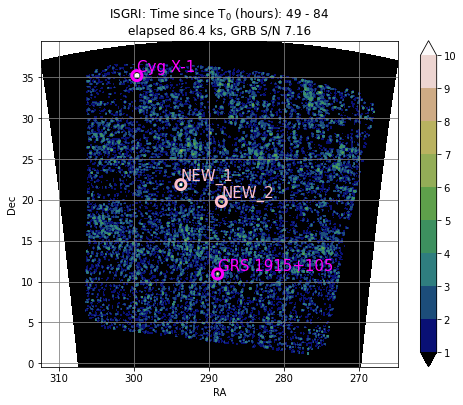

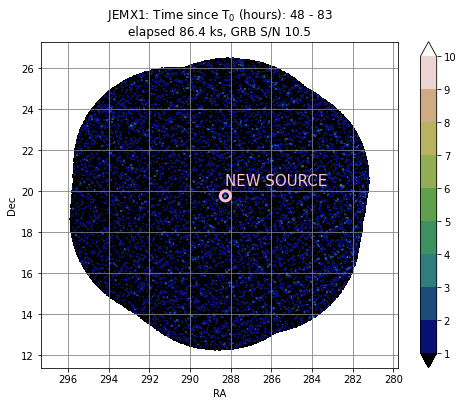

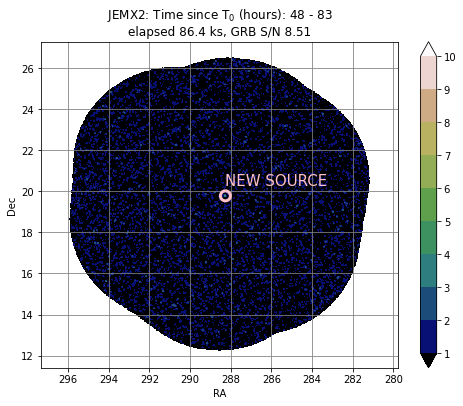

In [85]:
for name, image in source_images.items():
    if image:
        h = image.mosaic_image_0_mosaic.data_unit[4].header
        t = image.dispatcher_catalog_1.table
        m = SkyCoord(t['ra'], t['dec']).separation(src_coord).arcmin <10
        snr = t[m]['significance'][0] 

        t = Time(h['TSTART'] + 51544, format='mjd').isot
        oda_api.plot_tools.OdaImage(image).show(sliders=False)
        plt.title(f"{name.upper()}: Time since T$_0$ (hours): {(h['TSTART'] - T0_ijd)*24:.2g} - {(h['TSTOP'] - T0_ijd)*24:.2g}\n"
                  f"elapsed {int(h['TSTOP'] - h['TSTART'])*24*3.6:.3g} ks, GRB S/N {snr:.3g}")

In [86]:
cat = source_images['isgri'].dispatcher_catalog_1

toremove = []
for i, r in enumerate(cat.table.iterrows()):
    print(r)
    if r[1].startswith('NEW_') or r[1].startswith('GRB') or r[1].startswith('SGR'):
        toremove.append(i)        

cat.table.add_row(
{
    'src_names': source_name,
    'ra': src_coord.ra.deg,
    'dec': src_coord.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})

sgr = SkyCoord.from_name('SGR 1935+2154')
cat.table.add_row(
{
    'src_names': 'SGR 1935+2154',
    'ra': sgr.ra.deg,
    'dec': sgr.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})


cat.table.remove_rows(toremove)

cat.table

(8, 'Cyg X-1', 98.33060455322266, 299.59564208984375, 35.20738983154297, -32768, 2, 0, 0.0002800000074785203)
(9, 'GRS 1915+105', 10.385772705078125, 288.83599853515625, 10.92446517944336, -32768, 2, 0, 0.0002800000074785203)
(78, 'NEW_1', 13.386083602905273, 293.7316589355469, 21.864295959472656, -32767, 0, 0, None)
(79, 'NEW_2', 7.155909061431885, 288.3334045410156, 19.79286003112793, -32767, 0, 0, None)


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str13,float64,float64,float64,int64,int64,int64,object
8,Cyg X-1,98.33060455322266,299.59564208984375,35.20738983154297,-32768,2,0,0.0002800000074785203
9,GRS 1915+105,10.385772705078125,288.83599853515625,10.92446517944336,-32768,2,0,0.0002800000074785203
0,GRB221009A,0.0,288.26429166666657,19.773083333333332,0,0,1,0.05
0,SGR 1935+2154,0.0,293.732,21.896722,0,0,1,0.05


In [87]:
from astropy.table import Table

m_source = [not s.startswith('NEW') for s in cat.table['src_names']]
cat.table = Table(cat.table[m_source])

cat.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[8, 9, 0, 0], ["Cyg X-1", "GRS 1915+105", "GRB221009A", "SGR 1935+2154"], [98.33060455322266, 10.385772705078125, 0.0, 0.0], [299.59564208984375, 288.83599853515625, 288.26429166666657, 293.732], [35.20738983154297, 10.92446517944336, 19.773083333333332, 21.896722], [-32768, -32768, 0, 0], [2, 2, 0, 0], [0, 0, 1, 1], [0.0002800000074785203, 0.0002800000074785203, 0.05, 0.05]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U13"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [88]:
!pip install linked-data-latex

from ddpaper.draftdata import DraftData

with DraftData() as dd:
    dd['obs'] = dict(
        tstart_isot="",
        tstop_isot=""
    )


/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


In [89]:
source_products = {}

for product in [
        "isgri_lc",
        "isgri_spectrum",
        "isgri_image",
        "isgrihe_image",
        "jemx1_lc",
        "jemx1_spectrum",
        "jemx1_image",
        "jemx2_lc",
        "jemx2_spectrum",
        "jemx2_image",
    ]:
    disp.wait = False
    
    if 'jemx' in product:
        e1, e2 = 3, 30
    else:
        e1, e2 = 28, 80
    
    jnum = 1
    product_pass = product

    if 'jemx1' in product:
        jnum=1
        product_pass = product.replace("jemx1_", "jemx_")
    elif 'jemx2' in product:
        jnum=2
        product_pass = product.replace("jemx2_", "jemx_")
    elif 'isgrihe' in product:
        e1, e2 = 80, 200
        product_pass = product.replace("isgrihe_", "isgri_")
    
    source_products[product] = disp.get_product(
        instrument=product_pass.split("_")[0],
        product=product_pass,
        osa_version="OSA11.2",
        scw_list=[s+".000" for s in scw_list],
        token = oda_api.token.discover_token(),
        E1_keV=e1,
        E2_keV=e2,
        jemx_num=jnum,
        selected_catalog=cat.get_api_dictionary(),
        integral_data_rights="all-private",
    )

found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665986222,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665986222,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1665986222,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user

In [90]:
source_products

{'isgri_lc': <oda_api.api.DataCollection at 0x7f743a1286d0>,
 'isgri_spectrum': <oda_api.api.DataCollection at 0x7f74a05a5700>,
 'isgri_image': <oda_api.api.DataCollection at 0x7f747d42f460>,
 'isgrihe_image': <oda_api.api.DataCollection at 0x7f7439ee5d90>,
 'jemx1_lc': <oda_api.api.DataCollection at 0x7f747e3c4c40>,
 'jemx1_spectrum': <oda_api.api.DataCollection at 0x7f7439e81bb0>,
 'jemx1_image': <oda_api.api.DataCollection at 0x7f7439e813a0>,
 'jemx2_lc': <oda_api.api.DataCollection at 0x7f747d3269d0>,
 'jemx2_spectrum': <oda_api.api.DataCollection at 0x7f747f04ed90>,
 'jemx2_image': <oda_api.api.DataCollection at 0x7f7439fafb50>}

In [91]:
d = source_products['isgrihe_image']
d.dispatcher_catalog_1.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[0, 2, 3, 4, 5, 6], ["Cyg X-1", "NEW_1", "NEW_2", "NEW_3", "NEW_4", "NEW_5"], [22.51062774658203, 7.993988037109375, 7.385739326477051, 7.302313804626465, 7.129347324371338, 7.061872959136963], [299.6002197265625, 278.64697265625, 278.7252502441406, 279.2535095214844, 279.1972961425781, 278.9812316894531], [35.19944381713867, 4.273799896240234, 5.566497325897217, 4.508616924285889, 4.1296257972717285, 5.188943386077881], [-32768, -32767, -32767, -32767, -32767, -32767], [2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0.0, null, null, null, null, null]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U7"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(
Set MJD-OBS to 59863.612558 from DATE-OBS.
Set MJD-END to 59865.0405

no GRB here!
no GRB here!


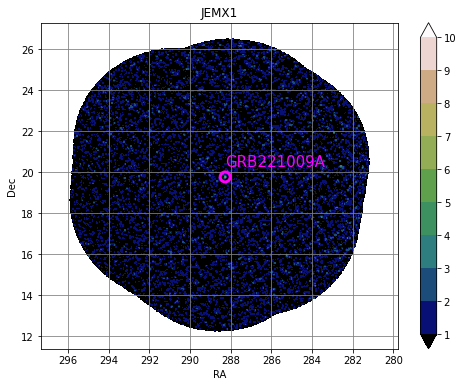

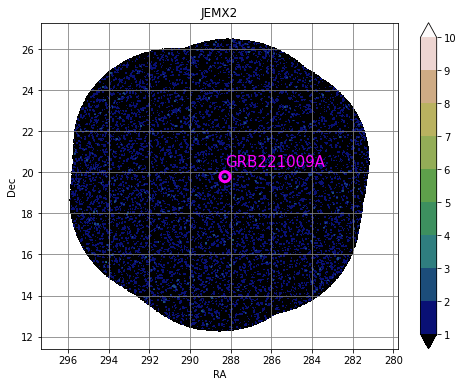

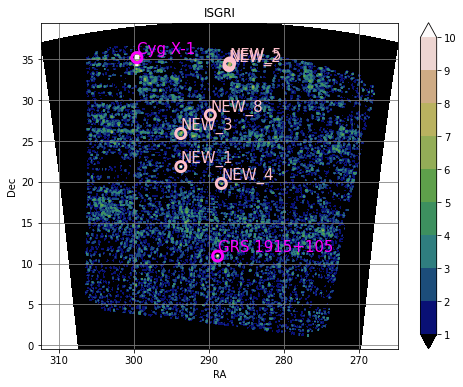

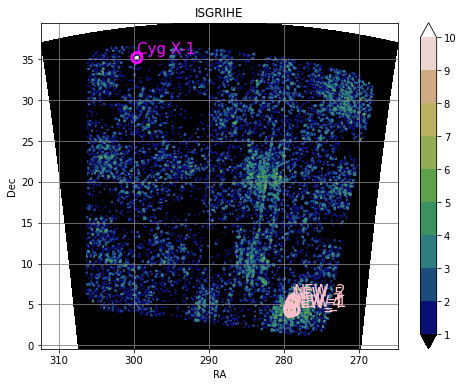

In [92]:
for instrument in 'jemx1', 'jemx2', 'isgri', 'isgrihe':
    p = source_products[instrument + '_image']
    oda_api.plot_tools.OdaImage(p).show(sliders=False) #, header="JEM-X")
    oda_api.plot_tools.OdaImage(p).write_fits(instrument + "_")
    plt.title(instrument.upper())
    plt.savefig(f"figs/{instrument}.png")

    with DraftData() as dd:
        try:
            dd[instrument] = {'snr': float(p.dispatcher_catalog_1.table[p.dispatcher_catalog_1.table['src_names'] == "GRB221009A"]['significance'][0])}
        except IndexError:
            print("no GRB here!")
        


/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:447: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:447: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:447: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:447: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:447: UserWar

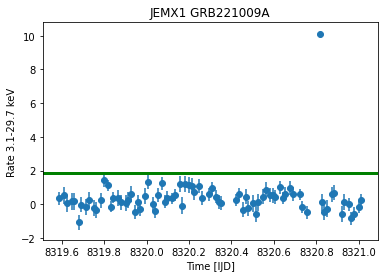

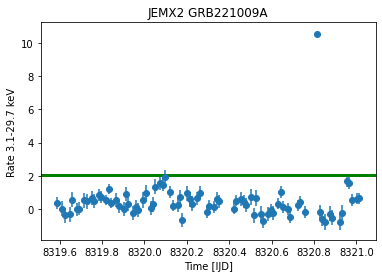

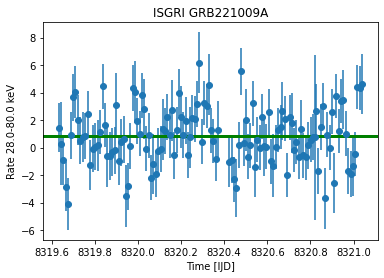

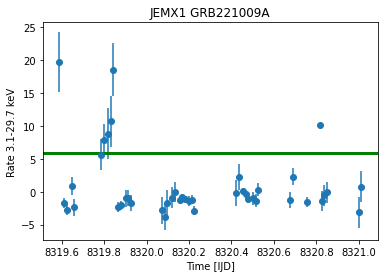

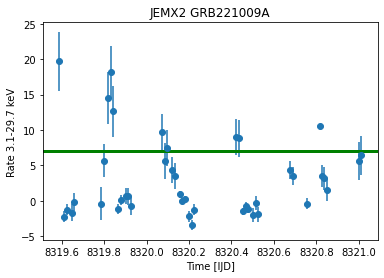

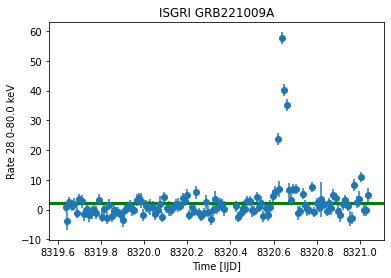

In [108]:
import re

for name in 'GRB221009A', 'SGR 1935+2154':
    name_stub = re.sub("[^0-9a-zA-Z]", "", name).lower()

    for instrument in 'jemx1', 'jemx2', 'isgri':
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).show(in_source_name=name)
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).write_fits(name)
        plt.title(instrument.upper() + " " + name)
        plt.savefig(f"figs/lc_{instrument}_{name_stub}.png")


In [94]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    p = source_products[instrument + '_spectrum']
    oda_api.plot_tools.OdaSpectrum(source_products[instrument + '_spectrum']).write_fits('GRB221009A')
    
    spec = getattr(p, [l['prod_name'] for l in p.as_list() if l['meta_data:']['src_name'] == 'GRB221009A'][0])
    
    with DraftData() as dd:
        dd[instrument]['exposure_s'] = spec.data_unit[1].header['EXPOSURE']
 


Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most othe

In [95]:
with DraftData() as dd:
    dd['joint_fit'] = dict(
        e1_keV=3,
        e2_keV=80,
        flux_ecs = 4.4263e-10, # ergs/cm^2/s) range (3.0000 - 80.000 keV
        flux_ecs_err_68p = (4.215e-10 - 4.4263e-10, 4.670e-10 - 4.4263e-10),
        slope = 2.15041,
        slope_err_90p = (-0.0712388,0.0841283)
    )

In [96]:
acslc_r = requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/{T0_ijd}/20000")
import pandas as pd
import io

acslc = pd.read_csv(io.StringIO(acslc_r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)
acslc

,t,dt,c,ds
0,8317.321991,0.022610,5460.0,27750.838610
1,8317.321992,0.072609,5432.0,27750.888609
2,8317.321992,0.122610,5340.0,27750.938610
3,8317.321993,0.172610,5386.0,27750.988610
4,8317.321993,0.222609,5238.0,27751.038609
...,...,...,...,...
799995,8317.784951,39999.799670,5328.0,67750.615673
799996,8317.784952,39999.849670,5276.0,67750.665672
799997,8317.784953,39999.899680,5212.0,67750.715675
799998,8317.784953,39999.949670,5278.0,67750.765675


In [97]:
bkg = np.mean(acslc.c[acslc.t<T0_ijd - 1000./24/3600])


def rebin(x, n):
    N = int(len(x)/n)
    return np.array(x[:N*n]).reshape((N, n)).sum(1)


from scipy.optimize import curve_fit

F = lambda x,a,b,c,d: a+b*x+c*x**2+d*x**3
n = 1000
T = (rebin(acslc.t, n)/n - T0_ijd)*24
m = T < -1
m |= T > 3

curve = curve_fit(
    F,
    T[m],
    (rebin(acslc.c, n)/n - bkg)[m]
    )


curve

(array([-1.45827937e+01, -4.29916314e+00,  2.10266238e-01,  2.92586516e-03]),
 array([[ 1.10826164e-01,  2.08051289e-02, -5.47696719e-03,
         -8.94704751e-04],
        [ 2.08051289e-02,  1.56255518e-02, -9.45498371e-04,
         -6.90606191e-04],
        [-5.47696719e-03, -9.45498371e-04,  3.42733153e-04,
          4.07157718e-05],
        [-8.94704751e-04, -6.90606191e-04,  4.07157718e-05,
          3.37193130e-05]]))

Text(0.5, 0, 'hours since 2022-10-09T13:17:00')

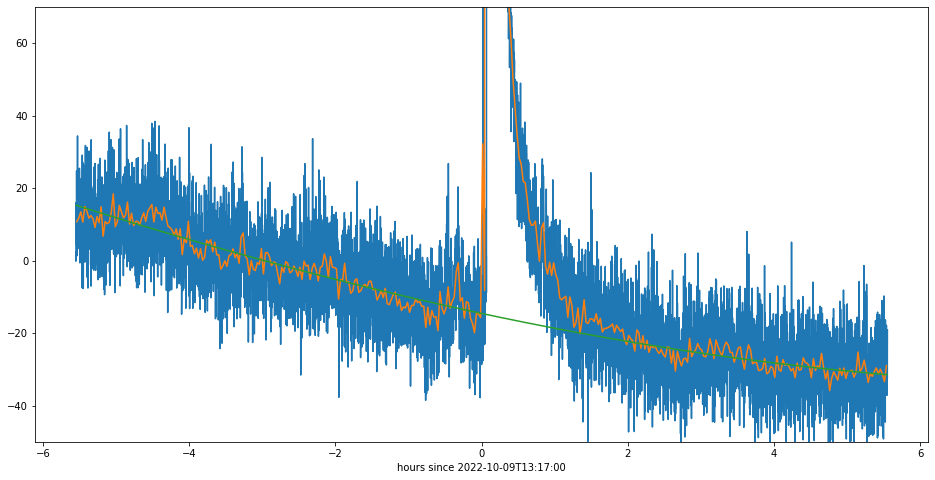

In [98]:
plt.figure(figsize=(16,8))


for n in 100, 2000:

    plt.plot(
        (rebin(acslc.t, n)/n - T0_ijd)*24,
        rebin(acslc.c, n)/n - bkg
    )

# plt.plot(
#     T[m],
#     (rebin(acslc.c, n)/n - bkg)[m]
# )

plt.plot(
    T,
    F(T, *curve[0])
)

plt.ylim([-50,70])

plt.xlabel(f'hours since {T0_isot}')

[]

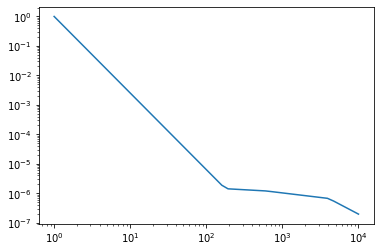

In [99]:
def xrt_decay(t):
    # #32671
    slopes = """Alpha_1 : 2.6 (+0.4, -0.7)
    Tbreak_1: 177.4 (+2.0, -9.6)
    Alpha_2 : 0.144 (+0.022, -0.026)
    Tbreak_2: 610 (+84, -78)
    Alpha_3 : 0.31 (+0.04, -0.03)
    Tbreak_3: 4060 [+0.23, -0.19])
    Alpha_4 : 1.357 (+/-0.010)"""

    slopes =  {s.split(":")[0].strip(): float(s.split(":")[1].split()[0].strip()) for s in slopes.split("\n")}

    r = t**(-slopes['Alpha_1'])

    m = t > slopes['Tbreak_1']
    rn1 = slopes['Tbreak_1']**(-slopes['Alpha_1']) / slopes['Tbreak_1']**(-slopes['Alpha_2'])
    r[m] = t[m]**(-slopes['Alpha_2']) * rn1

    m = t > slopes['Tbreak_2']
    rn2 = slopes['Tbreak_2']**(-slopes['Alpha_2']) / slopes['Tbreak_2']**(-slopes['Alpha_3']) 
    r[m] = t[m]**(-slopes['Alpha_3']) * rn1 * rn2


    m = t > slopes['Tbreak_3']
    rn3 = slopes['Tbreak_3']**(-slopes['Alpha_3']) / slopes['Tbreak_3']**(-slopes['Alpha_4']) 
    r[m] = t[m]**(-slopes['Alpha_4']) * rn1 * rn2 * rn3
    
    return r


t = np.logspace(0,4)

plt.figure()

plt.plot(
    t,
    xrt_decay(t)
)

plt.loglog()


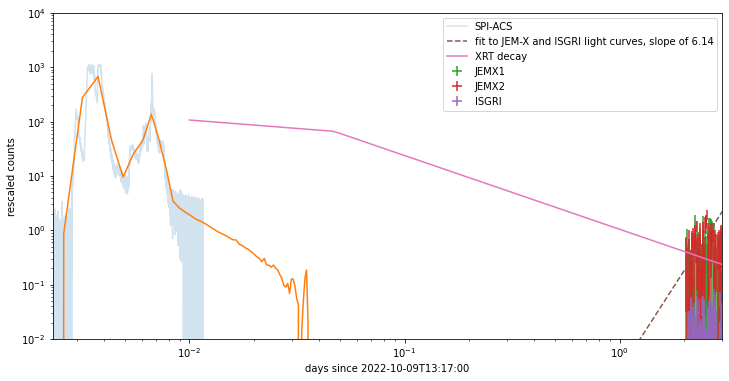

In [100]:
from statistics import mode


d_j1 = source_products['jemx1_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_j2 = source_products['jemx2_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_i = source_products['isgri_lc'].isgri_lc_2_GRB221009A.data_unit[1].data

plt.figure(figsize=(12,6))

m = acslc.t  - T0_ijd > -200/24/3600
m = acslc.t  - T0_ijd < 1000/24/3600

plt.plot(
    (acslc.t - T0_ijd)[m],
    (acslc.c - bkg)[m]/1e2,
    alpha=0.2,
    label="SPI-ACS"
)

n = 1000
plt.plot(
        (rebin(acslc.t, n)/n - T0_ijd),
        (rebin(acslc.c, n)/n - bkg)/1e2
    )


for d, f, n in [
    (d_j1, 1, 'JEMX1'),
    (d_j2, 1, 'JEMX2'),
    (d_i, 0.01, 'ISGRI'),
]:    
    plt.errorbar(
        d['TIME'] - T0_ijd, 
        f*d['RATE'], f*d['ERROR'], xerr=d['TIMEDEL']/2, ls="", label=n)



plt.loglog()
plt.xlim([200./24/3600, 3])
plt.xlabel(f"days since {T0_isot}")

# plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
# plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)

np.sum(d['TIMEDEL'])*24*3600


from scipy.optimize import minimize

# minimize()l
t_model = lambda t, N, slope: N*t**slope

def loss(p):
    N, slope = p
    return np.sum(((t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'])**2) + \
           np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) #+ \
        #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

N_fitted, slope_fitted = minimize(loss, [1, 0]).x
t = np.logspace(-1.5, 1, 100)
plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope of {slope_fitted:.3g}')

t = np.logspace(-2, 1, 100)
plt.plot(t, xrt_decay(t*24*3600)*1e8, label="XRT decay")

plt.legend()

plt.ylim([1e-2, 1e4])

plt.ylabel("rescaled counts")
plt.savefig("figs/joint_lc.png")

# https://www.swift.ac.uk/burst_analyser/01126853/
# https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

In [101]:
with DraftData() as dd:
    dd['T0_isot'] = T0_isot
    dd['obs']['tstart_isot'] = Time(d_j1['TIME'].min()+51544, format='mjd').isot
    dd['obs']['tstart_since_t0'] = d_j1['TIME'].min() - T0_ijd
    dd['obs']['tstop_isot'] = Time(d_j1['TIME'].max()+51544, format='mjd').isot
    dd['obs']['tstop_since_t0'] = d_j1['TIME'].max() - T0_ijd
    dd['obs']['ontime_s'] = np.sum(d_j1['TIMEDEL'])*24*3600

/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


In [102]:
with DraftData() as dd:
    dd['scheduled_obs'] = {
        'T1_isot': '2022-10-11 13:52:21',
        'T2_isot': '2022-10-13 00:58:26'
    }

In [103]:
!curl https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/UTC/2022-10-09T13:17:00/SCWID

255800290010

In [104]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

In [105]:
from astropy.io import fits

compton_events = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800290010.000/compton_events.fits.gz")
compton_events1 = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800300021.000////compton_events.fits.gz")
compton_events2 = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800300010.000///compton_events.fits.gz")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800290010.000/compton_events.fits.gz'

In [ ]:
for e in compton_events2:
    print(e.header.get('EXTNAME'))

In [ ]:
mce = dict()

for i in range(8):
    mce[i] = pd.read_csv(
        io.StringIO(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ISGRIRAW_MCE{i}/{T0_ijd}/2000").text), 
        skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)


np.sum([mce[i].c for i in range(8)], axis=0)

In [ ]:
plt.figure(figsize=(16, 6))

for color, ext in ('g', "COMP-MULE-ALL"), ('r', 'COMP-SGLE-ALL'):
    label=ext
    
    for c in compton_events, compton_events1, compton_events2:
        T = c[ext].data['TIME']
        E = c[ext].data['ISGRI_ENERGY']

        plt.hist((T - T0_ijd)*24*3600, bins=1000, alpha=0.3, color=color, label=label)
        label = None
    
# for i in range(8):
plt.plot((mce[0].t- T0_ijd)*24*3600, np.sum([mce[i].c for i in range(8)], axis=0 )/20, label="ISGRI RAW rate")

plt.legend()
plt.xlabel(f"seconds since {T0_isot}")
plt.xlim([0, 1000])

In [ ]:
mce[0].t[:10], mce[2].t[:10]